<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Monte%20Carlo%20Betting%20Simulations/d'Alambert_betting_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo Simulation**
Monte carlo simulators are often used to assess the risk of a given trading strategy say with options or stocks.

Monte carlo simulators can help drive the point home that success and outcome is not the only measure of whether or not a choice was good or not. Choices should not be assesed after their outcome. Instead, the risks and benefits should only be considered at the time the decision was made, without hindsight bias. A monte carlo simulator can help one visualize most or all of the potential outcomes to have a much better idea regarding the risk of a decision.

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np

Let's consider a basic example. Here, we will consider a gambling scenario, where a user can "roll" the metaphorical dice for an outcome of 1 to 100.

If the user rolls anything from 1-50, the "house" wins. If the user rolls anything from 51 to 99, the "user" wins. If the user rolls a 100, they lose.
With this, the house maintains a mere 1% edge, which is much smaller than the typical house edge, as well as the market edge when incorporating trading costs.

In [0]:
def rollDice():
    
    roll = random.randint(1,100)

    if roll == 100:
        #print (roll,' roll was 100, you lose. What are the odds?! Play again!')
        return False
        
    elif roll <= 50:
        #print (roll, ' roll was 1-50, you lose.')
        return False
    
    elif 100 > roll >= 51:
        #print (roll, ' roll was 51-99, you win! *pretty lights flash* (play more!')
        return True

## **D’Alembert** 
system is one of the simpler betting systems. In terms of its popularity it’s probably second only to the Martingale system. It actually shares some characteristics with the Martingale, as they are both negative progressions that involve increasing stake sizes after a losing bet and decreasing them after a winning bet.
Stakes are increased more slowly with this system than with the Martingale though, making it less likely for the stakes to get ridiculously high. This is an advantage to some extent, however the flipside to this is that losses are recovered more slowly. So the chances of making some kind of loss are actually greater, but the size of any losses are generally less catastrophic when hitting a streak of bad luck.


In [0]:
def dAlembert(funds,initial_wager,wager_count):#,color):

    global da_busts
    global da_profits
    global ROI
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print ('current wager:',wager,'value:',value)

            if rollDice():
                value += wager
                #print ('we won! Current Value:',value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print ('we lost, current value',value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print ('Lost the last wager, current wager:',wager,'value:',value)
            
            if rollDice(): 
                value += wager
                #print ('we won! Current Value:',value)
                previousWagerAmount = wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print ('we lost, current value',value)
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1
        
    ROI += value
    
    plt.plot(wX,vY)

    if value > funds:
        da_profits+=1

## **Simulation**
Lets simulate 10.000 bettors, starting with 10.000USD, betting 1USD starting wager per hand and betting 10.000 times and graph the results

100%|██████████| 10000/10000 [03:55<00:00, 34.77it/s]


Total Amount Invested: 100000000
Total Return: 15813129.0
Difference: -84186871.0
Bust Rate: 81.89
Profit Rate: 7.539999999999999


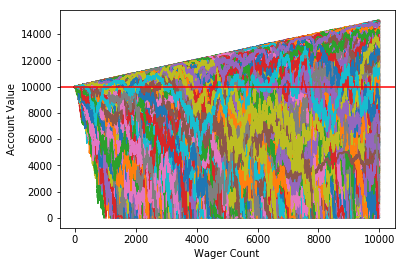

In [4]:
sample_size = 10000

startingFunds = 10000
wagerSize = 1
wagerCount = 10000

da_busts = 0.0
da_profits = 0.0
ROI = 0.0

for i in tqdm(range(sample_size)):   
    dAlembert(startingFunds,wagerSize,wagerCount)
    
print ('Total Amount Invested:', sample_size * startingFunds)
print ('Total Return:',ROI)
print ('Difference:',ROI-(sample_size * startingFunds))
print ('Bust Rate:',(da_busts/sample_size)*100.00)
print ('Profit Rate:',(da_profits/sample_size)*100.00)
    
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.axhline(startingFunds, color = 'r')
plt.show()